# **Clone Repository & Setup Project**

In [ ]:
# ============================
# Project Setup
# ============================

!git clone https://github.com/Rodexxx24/credit-scoring-ml.git

Cloning into 'credit-scoring-ml'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 51 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 39.13 KiB | 2.79 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# **Masuk ke Direktori Proyek**

In [ ]:
%cd credit-scoring-ml

/content/credit-scoring-ml/credit-scoring-ml/credit-scoring-ml/credit-scoring-ml


# **Verifikasi Struktur Folder**

In [ ]:
!ls

data  notebooks  README.md  requirements.txt  results  src


# **Install Dependencies**

In [ ]:
# ============================
# Install Required Libraries
# ============================

!pip install -r requirements.txt

# **Import Library & Visual Setup**

In [ ]:
# ============================
# EDA 1 - Environment Setup
# ============================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")

# **Load Dataset (German Credit – UCI)**

In [ ]:
# ============================
# Load German Credit Dataset
# Source: UCI Machine Learning Repository
# ============================

columns = [
    "Status_Checking_Account", "Duration", "Credit_History", "Purpose",
    "Credit_Amount", "Savings_Account", "Employment_Duration",
    "Installment_Rate", "Personal_Status_Sex", "Other_Debtors",
    "Residence_Since", "Property", "Age", "Other_Installment_Plans",
    "Housing", "Number_Credits", "Job", "People_Maintained",
    "Telephone", "Foreign_Worker", "Risk"
]

data_path = "data/raw/german_credit_uci.data"

df = pd.read_csv(
    data_path,
    header=None,
    sep=r"\s+",
    engine="python",
    names=columns
)

# **Verifikasi Struktur Dataset**

In [ ]:
# ============================
# Dataset Structure Check
# ============================

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 21)


,Status_Checking_Account,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# **Informasi Tipe Data**

In [ ]:
# ============================
# Data Types & Basic Information
# ============================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status_Checking_Account  1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings_Account          1000 non-null   object
 6   Employment_Duration      1000 non-null   object
 7   Installment_Rate         1000 non-null   int64 
 8   Personal_Status_Sex      1000 non-null   object
 9   Other_Debtors            1000 non-null   object
 10  Residence_Since          1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_Installment_Plans  1000 non-null   object
 14  Housing                  1000 non-null   

# **Distribusi Target (Risk)**

In [ ]:
# ============================
# Target Variable Distribution
# ============================

df["Risk"].value_counts()

,count
Risk,
1,700
2,300


In [ ]:
df["Risk"].value_counts(normalize=True)

,proportion
Risk,
1,0.7
2,0.3


# **Label Mapping (Interpretatif)**

In [ ]:
# ============================
# Risk Label Mapping
# ============================

df["Risk_Label"] = df["Risk"].map({1: "Good", 2: "Bad"})
df["Risk_Label"].value_counts()

,count
Risk_Label,
Good,700
Bad,300


# **Visualisasi Distribusi Target**

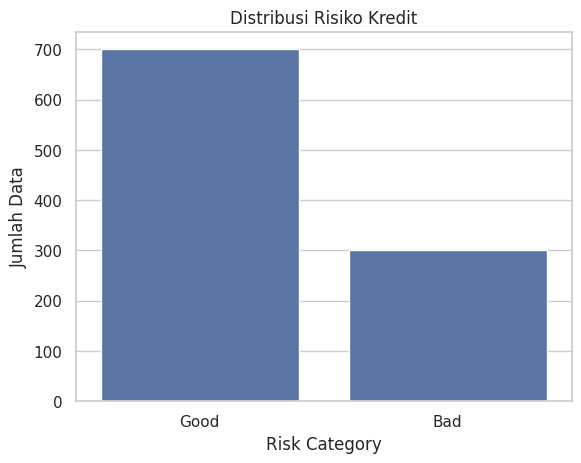

In [ ]:
sns.countplot(x="Risk_Label", data=df)
plt.title("Distribusi Risiko Kredit")
plt.xlabel("Risk Category")
plt.ylabel("Jumlah Data")
plt.show()

# **Identifikasi Tipe Fitur**

In [53]:
# ============================
# Feature Type Identification
# ============================

categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['Status_Checking_Account', 'Credit_History', 'Purpose', 'Savings_Account', 'Employment_Duration', 'Personal_Status_Sex', 'Other_Debtors', 'Property', 'Other_Installment_Plans', 'Housing', 'Job', 'Telephone', 'Foreign_Worker', 'Risk_Label']

Numerical Features:
['Duration', 'Credit_Amount', 'Installment_Rate', 'Residence_Since', 'Age', 'Number_Credits', 'People_Maintained', 'Risk']


# **Statistik Dasar Fitur Numerik**

In [54]:
# ============================
# Numerical Feature Statistics
# ============================

df[numerical_features].describe()

,Duration,Credit_Amount,Installment_Rate,Residence_Since,Age,Number_Credits,People_Maintained,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# **Distribusi Fitur Numerik Utama**

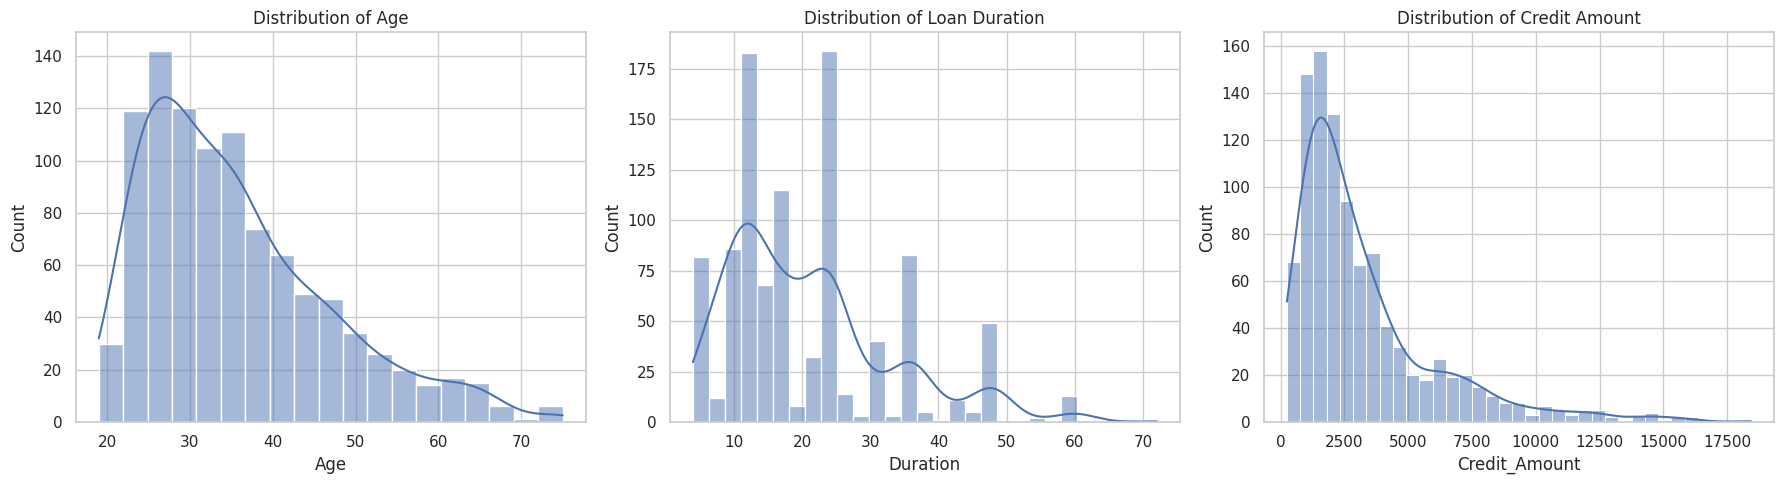

In [55]:
# ============================
# Distribution of Key Numerical Features
# ============================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Age"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Age")

sns.histplot(df["Duration"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Loan Duration")

sns.histplot(df["Credit_Amount"], kde=True, ax=axes[2])
axes[2].set_title("Distribution of Credit Amount")

plt.tight_layout()
plt.show()

# **Hubungan Target vs Numerik**

In [56]:
# ============================
# Risk vs Numerical Features
# ============================

df.groupby("Risk")[numerical_features].mean()

,Duration,Credit_Amount,Installment_Rate,Residence_Since,Age,Number_Credits,People_Maintained,Risk
Risk,,,,,,,,
1,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714,1.0
2,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333,2.0
